## The K-Nearest Neighbor

In [46]:
import numpy as np
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set()

In [47]:
#Load the breast cancer dataset and only select mean area and mean compactiness

In [48]:
breast_cancer = load_breast_cancer()
x = pd.DataFrame(breast_cancer.data, columns = breast_cancer.feature_names)
x = x[['mean area', 'mean compactness']]
y = pd.Categorical.from_codes(breast_cancer.target, breast_cancer.target_names)
y = pd.get_dummies(y, drop_first = True)

In [49]:
x.tail(), x.head()

(     mean area  mean compactness
 564     1479.0           0.11590
 565     1261.0           0.10340
 566      858.1           0.10230
 567     1265.0           0.27700
 568      181.0           0.04362,
    mean area  mean compactness
 0     1001.0           0.27760
 1     1326.0           0.07864
 2     1203.0           0.15990
 3      386.1           0.28390
 4     1297.0           0.13280)

In [50]:
#Split the dataset into training and test 

In [51]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state = 1205)

In [52]:
#Build the KNN Model

In [53]:
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean')

In [54]:
knn.fit(x_train, y_train)

C:\Users\OWNER\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [55]:
y_pred = knn.predict(x_test)

In [56]:
#visualize the predictions

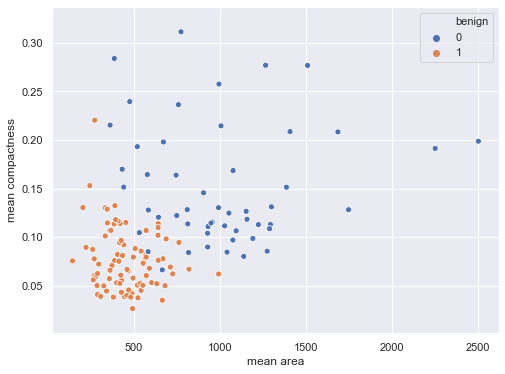

In [57]:
plt.figure(figsize = (8,6))
sns.scatterplot(
    x = 'mean area',
    y = 'mean compactness',
    hue = 'benign',
    data = x_test.join(y_test, how = 'outer'))

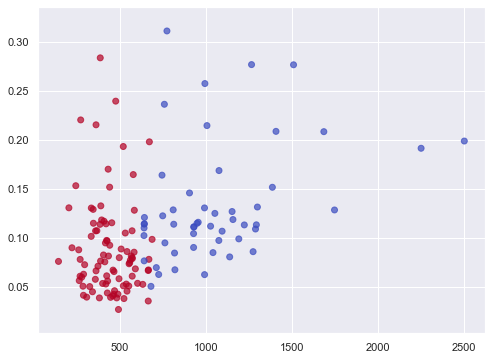

In [58]:
plt.figure(figsize = (8,6)),
plt.scatter(
    x_test['mean area'],
    x_test['mean compactness'],
    c = y_pred,
    cmap = 'coolwarm',
    alpha = 0.7
)

In [59]:
#confusion matric to evaluate model

In [60]:
confusion_matrix(y_test, y_pred)

array([[42, 13],
       [10, 78]], dtype=int64)

In [61]:
print (metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.76      0.79        55
           1       0.86      0.89      0.87        88

    accuracy                           0.84       143
   macro avg       0.83      0.82      0.83       143
weighted avg       0.84      0.84      0.84       143



In [62]:
# we can see the accuracy of the model was not too bad at 84% (F1 Score)